In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# COLLECTING THE DATA

In [2]:
train = pd.read_csv('train.csv')
assign = pd.read_csv('test.csv')

# CHOOSING MEASURE OF SUCCESS 
SINCE THE GIVEN DATA IS AN EXAMPLE OF CLASSIFICATION PROBLEM, Hence we will use RECALL , PRECISION and ACCURACY

In [82]:
def success(y_train , y_pred):
    cm_tr  = confusion_matrix(y_train, y_pred).ravel()

    precision_tr = cm_tr[3]/(cm_tr[3]+cm_tr[1])
    recall_tr = cm_tr[3]/(cm_tr[3]+cm_tr[2])

    print('PRECISION : ' , precision_tr)
    print('RECALL    : ' , recall_tr)
    print('ACCURACY : ' , accuracy_score(y_train, y_pred))
    K = 2*(precision_tr * recall_tr)/(precision_tr+ recall_tr)
    print('F2 SCORE :' , K)

# Setting an Evaluation Protocol 
### 1.Maintaining a Hold Out Validation Set

In [83]:
X_train ,X_test ,  y_train , y_test = train_test_split(train.drop(['Attrition' , 'Id'] , axis = 1) , train['Attrition'] , test_size = 0.3)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Attrition' , 'Id'] , axis = 1), train['Attrition'], test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [85]:
X_assign = assign.drop(['Id'] , axis = 1)

# PREPARING THE DATA 

### HANDLING MISSING VALUE 

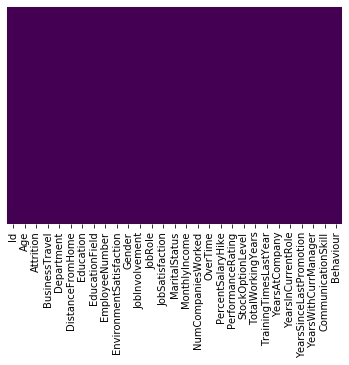

In [86]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#THERE ARE NO MISSING VALUES IN THE DATA

### Handling Caterogical Data

In [87]:
X_train = pd.get_dummies(X_train , columns = ['OverTime','JobRole','BusinessTravel','Department','EducationField','Gender','MaritalStatus' ] , drop_first = True)
X_val = pd.get_dummies(X_val , columns = ['OverTime','JobRole','BusinessTravel','Department','EducationField','Gender','MaritalStatus' ] , drop_first = True)
X_test = pd.get_dummies(X_test , columns = ['OverTime','JobRole','BusinessTravel','Department','EducationField','Gender','MaritalStatus' ] , drop_first = True)
X_assign  = pd.get_dummies(X_assign , columns = ['OverTime','JobRole','BusinessTravel','Department','EducationField','Gender','MaritalStatus' ] , drop_first = True)

# FEATURE SCALLING  

In [88]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_val_scaled = preprocessing.scale(X_val)
X_test_scaled = preprocessing.scale(X_test)
X_assign_scaled = preprocessing.scale(X_assign)

# SELECTING MEANINGFUL FEATURES 

In [89]:
X_train_scaled.shape

(976, 41)

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components =30)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [100]:
X_train_pca = pca.transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_assign_pca = pca.transform(X_assign_scaled)

# LOGISTIC REGRESSION

In [101]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
train_pred = LR.predict(X_train_pca)
val_pred = LR.predict(X_val_pca)
test_pred = LR.predict(X_test_pca)
print('====================TRAINING DATA===========================')
success(y_train , train_pred)
print('====================VALIDATION DATA===========================')
success(y_val , val_pred)
print('====================TESTING DATA===========================')
success(y_test , test_pred)

====================TRAINING DATA===========================
PRECISION :  0.7995867768595041
RECALL    :  0.8269230769230769
ACCURACY :  0.8176229508196722
F2 SCORE : 0.8130252100840336
====================VALIDATION DATA===========================
PRECISION :  0.7453416149068323
RECALL    :  0.7643312101910829
ACCURACY :  0.7607361963190185
F2 SCORE : 0.7547169811320755
====================TESTING DATA===========================
PRECISION :  0.7735849056603774
RECALL    :  0.76875
ACCURACY :  0.7760736196319018
F2 SCORE : 0.7711598746081505


# SVM CLASSIFIER

In [103]:
from sklearn.svm import SVC
SVC = SVC()
SVC.fit(X_train_pca , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [104]:
train_pred = SVC.predict(X_train_pca)
val_pred   = SVC.predict(X_val_pca)
test_pred  = SVC.predict(X_test_pca)
print('====================TRAINING DATA===========================')
success(y_train , train_pred)
print('====================VALIDATION DATA===========================')
success(y_val , val_pred)
print('====================TESTING DATA===========================')
success(y_test , test_pred)

====================TRAINING DATA===========================
PRECISION :  0.939203354297694
RECALL    :  0.9572649572649573
ACCURACY :  0.9497950819672131
F2 SCORE : 0.9481481481481482
====================VALIDATION DATA===========================
PRECISION :  0.8588957055214724
RECALL    :  0.89171974522293
ACCURACY :  0.8773006134969326
F2 SCORE : 0.8749999999999999
====================TESTING DATA===========================
PRECISION :  0.8606060606060606
RECALL    :  0.8875
ACCURACY :  0.8742331288343558
F2 SCORE : 0.8738461538461538


# DECISION TREE CLASSIFIER

In [105]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train_pca , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [106]:
train_pred = DTC.predict(X_train_pca)
val_pred   = DTC.predict(X_val_pca)
test_pred  = DTC.predict(X_test_pca)
print('====================TRAINING DATA===========================')
success(y_train , train_pred)
print('====================VALIDATION DATA===========================')
success(y_val , val_pred)
print('====================TESTING DATA===========================')
success(y_test , test_pred)

====================TRAINING DATA===========================
PRECISION :  1.0
RECALL    :  1.0
ACCURACY :  1.0
F2 SCORE : 1.0
====================VALIDATION DATA===========================
PRECISION :  0.7371794871794872
RECALL    :  0.732484076433121
ACCURACY :  0.745398773006135
F2 SCORE : 0.7348242811501596
====================TESTING DATA===========================
PRECISION :  0.7844311377245509
RECALL    :  0.81875
ACCURACY :  0.8006134969325154
F2 SCORE : 0.8012232415902141


# RANDOM FOREST CLASSIFIER 

In [113]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 200 , max_depth = 175 , min_samples_split = 4)
RFC.fit(X_train_pca , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=175, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
train_pred = RFC.predict(X_train_pca)
val_pred   = RFC.predict(X_val_pca)
test_pred  = RFC.predict(X_test_pca)
print('====================TRAINING DATA===========================')
success(y_train , train_pred)
print('====================VALIDATION DATA===========================')
success(y_val , val_pred)
print('====================TESTING DATA===========================')
success(y_test , test_pred)

====================TRAINING DATA===========================
PRECISION :  1.0
RECALL    :  1.0
ACCURACY :  1.0
F2 SCORE : 1.0
====================VALIDATION DATA===========================
PRECISION :  0.9551282051282052
RECALL    :  0.9490445859872612
ACCURACY :  0.9539877300613497
F2 SCORE : 0.952076677316294
====================TESTING DATA===========================
PRECISION :  0.9807692307692307
RECALL    :  0.95625
ACCURACY :  0.9693251533742331
F2 SCORE : 0.9683544303797469


In [115]:
from sklearn.model_selection import validation_curve

In [111]:
param_range = np.arange(2, 10, 1)
train_scores, val_scores = validation_curve(
                                RandomForestClassifier(),
                                X = X_train_pca, y = y_train, 
                                param_name = 'min_samples_split', 
                                param_range = param_range, cv = 3)

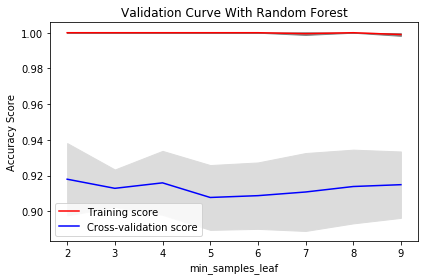

In [112]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range , train_mean, label="Training score", color="red")
plt.plot(param_range, val_mean, label="Cross-validation score", color="blue")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# NEURAL NETWORK

In [116]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(max_iter = 1000)
MLP.fit(X_train_pca , y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [117]:
train_pred = MLP.predict(X_train_pca)
val_pred   = MLP.predict(X_val_pca)
test_pred  = MLP.predict(X_test_pca)
print('====================TRAINING DATA===========================')
success(y_train , train_pred)
print('====================VALIDATION DATA===========================')
success(y_val , val_pred)
print('====================TESTING DATA===========================')
success(y_test , test_pred)

====================TRAINING DATA===========================
PRECISION :  1.0
RECALL    :  1.0
ACCURACY :  1.0
F2 SCORE : 1.0
====================VALIDATION DATA===========================
PRECISION :  0.8757062146892656
RECALL    :  0.9872611464968153
ACCURACY :  0.9263803680981595
F2 SCORE : 0.9281437125748504
====================TESTING DATA===========================
PRECISION :  0.8901734104046243
RECALL    :  0.9625
ACCURACY :  0.9233128834355828
F2 SCORE : 0.924924924924925


# Stochastic Gradient Descent

In [23]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
SGD.fit(X_train_pca , y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
train_pred = SGD.predict(X_train_pca)
val_pred   = SGD.predict(X_val_pca)
test_pred  = SGD.predict(X_test_pca)
print('====================TRAINING DATA===========================')
success(y_train , train_pred)
print('====================VALIDATION DATA===========================')
success(y_val , val_pred)
print('====================TESTING DATA===========================')
success(y_test , test_pred)

====================TRAINING DATA===========================
PRECISION :  0.7132075471698113
RECALL    :  0.8076923076923077
ACCURACY :  0.7520491803278688
F2 SCORE : 0.7575150300601203
====================VALIDATION DATA===========================
PRECISION :  0.6961325966850829
RECALL    :  0.802547770700637
ACCURACY :  0.7361963190184049
F2 SCORE : 0.7455621301775148
====================TESTING DATA===========================
PRECISION :  0.6827956989247311
RECALL    :  0.79375
ACCURACY :  0.7177914110429447
F2 SCORE : 0.7341040462427745


# HYPERPARAMETER TUNNING IN TOP THREE MEDELS

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
'''#MLP CLASSIFIER
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(X_train_pca, y_train)
print(clf.score(X_train_pca, y_train))
print(clf.best_params_)
'''

"#MLP CLASSIFIER\nparameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}\nclf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)\n\nclf.fit(X_train_pca, y_train)\nprint(clf.score(X_train_pca, y_train))\nprint(clf.best_params_)\n"

In [27]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# SAVING PREDICTIONS INTO CSV FILE 


In [28]:
assign_y =  SVC.predict(X_assign_pca)
l = np.concatenate([np.array(assign.Id).reshape(470,1) , assign_y.reshape(470,1)] , axis=1)
l = l.astype(int)
j = pd.DataFrame(l)
j.to_csv('svc_solution.csv', index=False, encoding='utf-8')

In [118]:
assign_y_RFC =  RFC.predict(X_assign_pca)
l = np.concatenate([np.array(assign.Id).reshape(470,1) , assign_y_RFC.reshape(470,1)] , axis=1)
l = l.astype(int)
j = pd.DataFrame(l)
j.to_csv('RANDOM_FOREST_solution.csv', index=False, encoding='utf-8')

In [30]:
assign_y_MLP =  MLP.predict(X_assign_pca)
l = np.concatenate([np.array(assign.Id).reshape(470,1) , assign_y_MLP.reshape(470,1)] , axis=1)
l = l.astype(int)
j = pd.DataFrame(l)
j.to_csv('NEURAL_solution.csv', index=False, encoding='utf-8')